# Project Title 

## Part 1. Quantitative Analysis of the Industry Sector

### A. Industry Sector Selection and Data Filtering

1. The industry sector that our group chose is "56 Apparel And Accessory Stores". 

In [1]:
# 2. Filtering data
# import public firm data
import pandas as pd

firms = pd.read_csv("data/public_firms.csv")
firms.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
0,1004,1994,USA,AAR CORP,1988/01/01,5080,13.375,22.487,10.463,425.814,451.395,0.024572
1,1004,1995,USA,AAR CORP,1988/01/01,5080,22.000,33.606,16.012,437.846,504.990,0.036570
2,1004,1996,USA,AAR CORP,1988/01/01,5080,30.250,51.705,23.025,529.584,589.328,0.043478
3,1004,1997,USA,AAR CORP,1988/01/01,5080,38.750,17.222,35.657,670.559,782.123,0.053175
4,1004,1998,USA,AAR CORP,1988/01/01,5080,23.875,8.250,41.671,726.630,918.036,0.057348


2. Next, filter the data in "data/public_firms.csv" to only include the firms belonging to the industry sector(s) you have selected. 

In [2]:
# Filtering firms belonging to the "Apparel And Accessory Stores" industry sector 
# (major_group = 56)

# Major group 56 corresponds to SIC codes starting with 56
filtered = firms[(firms["sic"] >= 5600) & (firms["sic"] < 5700)].copy()

# Display number of rows after filtering and show first few rows
print("Number of rows after filtering:", len(filtered))
filtered.head()


Number of rows after filtering: 1367


,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
5923,2484,1995,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,10.2500,14.520,14.866,735.269,1584.942,0.020218
5924,2484,1996,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,13.0000,73.560,29.013,704.731,1591.964,0.041169
5925,2484,1997,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,16.4370,157.394,56.515,775.077,1758.368,0.072915
5926,2484,1998,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,16.3125,106.952,47.783,941.635,1988.513,0.050745
5927,2484,1999,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,13.8750,127.818,61.120,1046.047,2198.696,0.058429


3.	Now, answer the following questions based on the filtered dataset: 
    1. How many unique firm-year ("fyear") observations are there in the filtered dataset?
    2. How many unique firms are there in the filtered dataset?
    3. How many firms in the filtered dataset have records over all 27 years (1994-2020)?

In [3]:
# 3. Questions based on filtered dataset

# a. unique firm-year observations
# Each row is one firm (gvkey) in one year (fyear).
# drop_duplicates() is used on [gvkey, fyear] to make sure that if a firm-year appears more than once in the dataset, it is only counted once.
n_firmyear = filtered[["gvkey", "fyear"]].drop_duplicates().shape[0]
print("a) Unique firm-year observations:", n_firmyear)

# b. unique firms (using gvkey)
unique_firms = filtered["gvkey"].nunique()
print("b) Unique firm observations:", unique_firms)

# c. firms that have records for all 27 years (1994–2020)
# count how many distinct years each firm appears in
full_period_firms = (filtered.groupby("gvkey")["fyear"].nunique())   
full_period_firms = (full_period_firms == 27).sum()  # count how many == 27 (ie. how many in all years)
print("c) Number of firms with records for all 27 years:", full_period_firms)

a) Unique firm-year observations: 1367
b) Unique firm observations: 105
c) Number of firms with records for all 27 years: 11


### B. Preliminary Analysis
1.	What are the top 10 firms with the highest stock price (column "prcc_c") in the year 2020?

In [4]:
# firms in year 2020
firms_2020 = filtered[filtered["fyear"] == 2020]
# top 10 firms in 2020 by stock price
top_10_2020 = firms_2020.sort_values(by="prcc_c", ascending=False).head(10)
print("Top 10 firms in 2020 by stock price:")
top_10_2020

Top 10 firms in 2020 by stock price:


,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
68733,18675,2020,USA,BURLINGTON STORES INC,2013/10/02,5600,261.55,1380.276,-216.499,6781.092,5763.980,-0.031927
33774,9248,2020,USA,ROSS STORES INC,NaN,5651,122.81,4819.293,85.382,12717.867,12531.565,0.006714
43543,11672,2020,USA,TJX COS INC (THE),NaN,5651,68.29,10469.570,90.470,30813.555,32136.962,0.002936
141569,65430,2020,USA,CHILDRENS PLACE INC,1997/09/19,5600,50.10,63.548,-140.365,1140.127,1522.598,-0.123113
184708,163051,2020,USA,CITI TRENDS INC,2005/05/18,5651,49.68,123.177,23.978,494.593,783.294,0.048480
76291,21898,2020,USA,BOOT BARN HOLDINGS INC,2014/10/30,5661,43.36,73.148,59.386,933.581,893.491,0.063611
43244,11584,2020,USA,FOOT LOCKER INC,NaN,5661,40.44,1680.000,323.000,7043.000,7548.000,0.045861
94181,27938,2020,USA,SHOE CARNIVAL INC,1993/03/16,5661,39.18,106.532,15.991,642.747,976.765,0.024879
23067,6733,2020,USA,BATH & BODY WORKS INC,NaN,5600,37.19,3903.000,844.000,11571.000,11847.000,0.072941
184613,162988,2020,USA,ZUMIEZ INC,2005/05/06,5651,36.78,73.622,76.227,998.364,990.652,0.076352


2.	What are the top 10 firms with the highest sales (column "sale") in the entire history of the dataset?

In [5]:
# sales of firms in the entire history
total_sales = filtered.groupby(["gvkey", "conm"])["sale"].sum().reset_index()
total_sales.rename(columns={"sale": "total_sales"}, inplace=True)
# total_sales is a dataframe with gvkey, conm, and total_sales columns
top_10_sales = total_sales.sort_values(by="total_sales", ascending=False).head(10)
print("Top 10 firms by total sales over the entire history:")
top_10_sales


Top 10 firms by total sales over the entire history:


,gvkey,conm,total_sales
23,11672,TJX COS INC (THE),531354.915
11,4990,GAP INC,362527.300
14,6733,BATH & BODY WORKS INC,274942.175
16,7922,NORDSTROM INC,248159.506
19,9248,ROSS STORES INC,188529.105
22,11584,FOOT LOCKER INC,167706.000
72,63643,ABERCROMBIE & FITCH -CL A,67874.646
7,4072,ASCENA RETAIL GROUP INC,65366.513
61,30059,AMERN EAGLE OUTFITTERS INC,63138.850
41,24171,DESIGNER BRANDS INC,57096.129


3.	What is the geographical distribution (column "location") of all the firms? In other words, how many firms are there in each location? Please list the top 10 locations. 

In [6]:
# group by location
firms_by_location = filtered.groupby("location")["gvkey"].nunique().reset_index()
firms_by_location.rename(columns={"gvkey": "num_firms"}, inplace=True)
# sort by number of firms in descending order
firms_by_location = firms_by_location.sort_values(by="num_firms", ascending=False).head(10)
print("Number of firms by location (top 10):")
firms_by_location

Number of firms by location (top 10):


,location,num_firms
1,USA,104
0,CAN,1


4. Create a line chart to show the average stock price (column "prcc_c") in the selected sector(s) across the years.

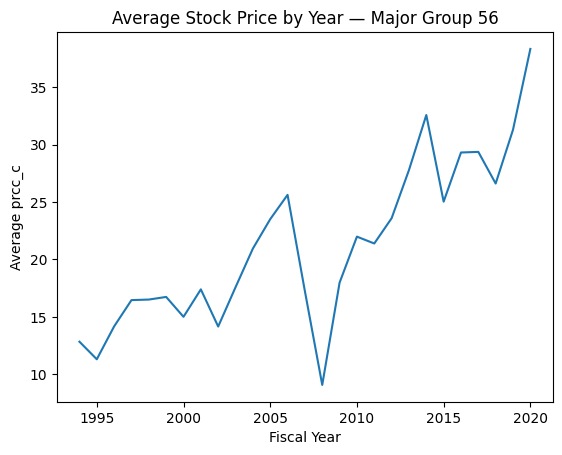

In [7]:
import matplotlib.pyplot as plt

avg_price_by_year = (filtered
                     .groupby("fyear", as_index=False)["prcc_c"]
                     .mean())

plt.plot(avg_price_by_year["fyear"], avg_price_by_year["prcc_c"])  
plt.title("Average Stock Price by Year — Major Group 56")
plt.xlabel("Fiscal Year")
plt.ylabel("Average prcc_c")
plt.show()   


5. Which firm was affected the most by the 2008 Financial Crisis, as measured by the percentage drop in stock price from 2007 to 2008?

In [8]:
# 1) avg price per firm-year in 2007 & 2008
avg = (filtered[ filtered["fyear"].isin([2007, 2008]) ]
         .groupby(["gvkey","conm","fyear"])["prcc_c"].mean().reset_index())

# 2) split and rename
prices_2007 = avg[avg["fyear"]==2007][["gvkey","conm","prcc_c"]]
prices_2007.columns=["gvkey","conm","p2007"]

prices_2008 = avg[avg["fyear"]==2008][["gvkey","conm","prcc_c"]]
prices_2008.columns=["gvkey","conm","p2008"]

# 3) merge & compute change (negative = drop)
merged_prices = prices_2007.merge(prices_2008, on=["gvkey","conm"])
merged_prices["percent_change_2007_to_2008"] = (merged_prices["p2008"] - merged_prices["p2007"]) / merged_prices["p2007"]

# 4) largest drop = most negative change
result = merged_prices.sort_values("percent_change_2007_to_2008").head(1)[
    ["conm","p2007","p2008","percent_change_2007_to_2008"]
]

print(result)


                        conm  p2007  p2008  percent_change_2007_to_2008
44  EDDIE BAUER HOLDINGS INC   6.35   0.51                    -0.919685


6. Plot the average Return on Assets (ROA) for the firms located in the “USA” across the years. ROA is calculated as ni/asset.

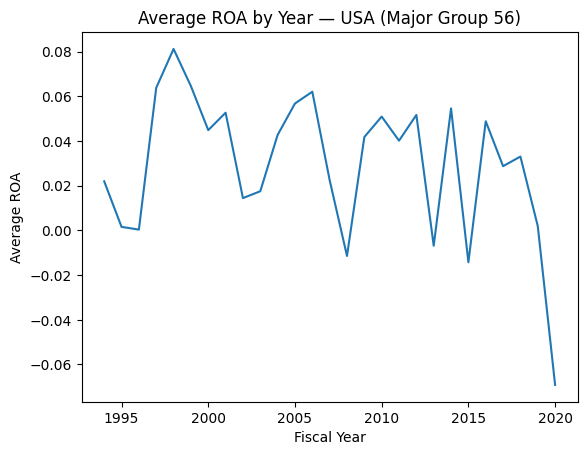

In [9]:
# Average ROA by year for USA firms (ROA = ni / asset)

usa = filtered[ filtered["location"] == "USA" ]
usa = usa[ usa["asset"] > 0 ]          
usa["roa"] = usa["ni"] / usa["asset"]

roa_by_year = usa.groupby("fyear")["roa"].mean().reset_index()

plt.plot(roa_by_year["fyear"], roa_by_year["roa"])
plt.title("Average ROA by Year — USA (Major Group 56)")
plt.xlabel("Fiscal Year")
plt.ylabel("Average ROA")
plt.show()

### Part 2. Text Analysis on the Industry Sector


C. Text Cleaning

In [10]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
import nltk

# Download required NLTK data
nltk.download('stopwords')

def clean_text(text):
    """
    Clean text by:
    1. Converting to lowercase
    2. Removing punctuation
    3. Removing stopwords
    """
    # Convert to lowercase
    text = str(text).lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Join words back together
    return ' '.join(words)


# After uploading, read the file directly:
df = pd.read_csv('data/2020_10K_item1_full.csv', on_bad_lines='skip', engine='python')

# Apply text cleaning to 'item_1_text' column and create new column 'cleaned_text'
df['cleaned_text'] = df['item_1_text'].apply(clean_text)

# Display the first few rows to verify the cleaning
print("\nFirst few rows of the cleaned dataset:")
print(df[['item_1_text', 'cleaned_text']].head())

# Please continue to use dataframe df, or uncomment below to save the cleaned dataset on a new csv. file
#df.to_csv('data/2020_10K_item1_cleaned.csv', index=False)
#print("\nCleaned dataset has been saved to '2020_10K_item1_cleaned.csv'")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



First few rows of the cleaned dataset:
                                         item_1_text  \
0  fixed expenses are previosuly documented in an...   
1  General Hurco Companies, Inc. is an internatio...   
2  We have been engaged in the business of develo...   
3  CORPORATE HISTORY Chun Can Capital Group (form...   
4  CORPORATE HISTORY Chun Can Capital Group (form...   

                                        cleaned_text  
0  fixed expenses previosuly documented 8k 235000...  
1  general hurco companies inc international indu...  
2  engaged business developing marketing products...  
3  corporate history chun capital group formerly ...  
4  corporate history chun capital group formerly ...  


D. Key Words Analysis

In [11]:
# 1. Create a new dataframe with only firms in the selected industry
import pandas as pd

# --- sanity checks: make sure required columns exist ---
assert {"gvkey","fyear"}.issubset(filtered.columns), "filtered must have 'gvkey' and 'fyear'"
assert "conm" in filtered.columns, "filtered should include firm name 'conm'"
assert {"gvkey","cleaned_text"}.issubset(df.columns), "df must have 'gvkey' and 'cleaned_text' from Part C"

# 1) sector subset in 2020 (one row per firm)
sector_2020 = (
    filtered.loc[filtered["fyear"] == 2020, ["gvkey","conm","location","fyear"]]
    .drop_duplicates(subset=["gvkey"])
)

# 2) inner join with cleaned text (from df)
dfD = (
    sector_2020
    .merge(df[["gvkey","cleaned_text"]], on="gvkey", how="inner")
)

print("Sector firms in 2020 (unique gvkey):", len(sector_2020))
print("After inner join with cleaned 10-K text:", len(dfD))
dfD.head()

Sector firms in 2020 (unique gvkey): 26
After inner join with cleaned 10-K text: 23


,gvkey,conm,location,fyear,cleaned_text
0,2818,CATO CORP -CL A,USA,2020,general company founded 1946 operated 1281 fas...
1,4990,GAP INC,USA,2020,general gap inc gap inc company incorporated s...
2,5109,GENESCO INC,USA,2020,general genesco inc genesco company us incorpo...
3,6733,BATH & BODY WORKS INC,USA,2020,general l brands inc company operates highly c...
4,7922,NORDSTROM INC,USA,2020,description business founded 1901 retail shoe ...


In [14]:
# D2. Top-10 keywords per firm (Counts & TF-IDF)

# --- 1) Word-counts method ---
from collections import Counter

def get_top_keywords(text, k=10):
    """Return the top-k most frequent tokens in a single document."""
    if not isinstance(text, str):
        text = ""
    words = text.split()
    c = Counter(words)
    return " ".join([w for w, _ in c.most_common(k)])

dfD["top10_count"] = dfD["cleaned_text"].apply(lambda s: get_top_keywords(s, k=10))

# --- 2) TF-IDF method ---
!pip3 install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def get_keywords_tfidf(document_list, k=10, max_features=5000, min_df=2):
    """
    Compute top-k TF-IDF keywords for each document.
    Returns a list[str], each string contains k space-joined keywords.
    """
    vectorizer = TfidfVectorizer(max_features=max_features, min_df=min_df, lowercase=False)
    tfidf_matrix = vectorizer.fit_transform(document_list)   # CSR matrix: (n_docs, n_terms)
    feature_names = vectorizer.get_feature_names_out()

    top_keywords = []
    for i in range(tfidf_matrix.shape[0]):
        row = tfidf_matrix[i, :]               # 1 x n_terms CSR row
        idx = row.nonzero()[1]                 # column indices of non-zero terms
        if idx.size == 0:
            top_keywords.append("")            # fallback for empty documents
            continue

        # Convert the TF-IDF scores for the non-zero terms to a 1D array
        vals = row[0, idx].toarray().ravel()
        # Take indices of the top-k scores in descending order
        order = np.argsort(vals)[::-1][:k]
        words = feature_names[idx[order]]
        top_keywords.append(" ".join(words))

        if i % 200 == 199:
            print(f"Processed {i+1}/{tfidf_matrix.shape[0]} documents.")
            
    return top_keywords

In [ ]:
# Print out results
docs = dfD["cleaned_text"].fillna("").tolist()
dfD["top10_tfidf"] = get_keywords_tfidf(docs, k=10)
preview = (
    dfD.loc[:, ["gvkey", "conm", "top10_count", "top10_tfidf"]]
       .head(10)                     # get the top 10 rows
       .reset_index(drop=True)       # remove the 0-based index
)
preview.index = preview.index + 1    # change index to 1-10
display(preview)

,gvkey,conm,top10_count,top10_tfidf
1,2818,CATO CORP -CL A,company merchandise stores sales credit store ...,company merchandise stores layaway credit sale...
2,4990,GAP INC,president gap vice executive stores brand appa...,gap president vice navy executive republic off...
3,5109,GENESCO INC,footwear stores 2020 fiscal operations retail ...,footwear stores dockers group 2020 license fis...
4,6733,BATH & BODY WORKS INC,secret victoria stores body 2020 products fina...,secret victoria body bath works coronavirus st...
5,7922,NORDSTROM INC,nordstrom customers merchandise stores invento...,nordstrom fullprice rack club customers mercha...
6,9248,ROSS STORES INC,stores merchandise discounts ross dd departmen...,ross dd discounts merchandise stores store dep...
7,11584,FOOT LOCKER INC,system clearpoint device fda may medical brain...,device medical system procedures healthcare de...
8,13381,DESTINATION XL GROUP INC,stores store dxl fiscal customers casual merch...,stores store casual fiscal merchandise custome...
9,18675,BURLINGTON STORES INC,stores fiscal merchandise store believe inform...,stores burlington fiscal merchandise store wea...
10,21898,BOOT BARN HOLDINGS INC,magnegas date company gasification us units pr...,date gas units industrial issue fuel company f...


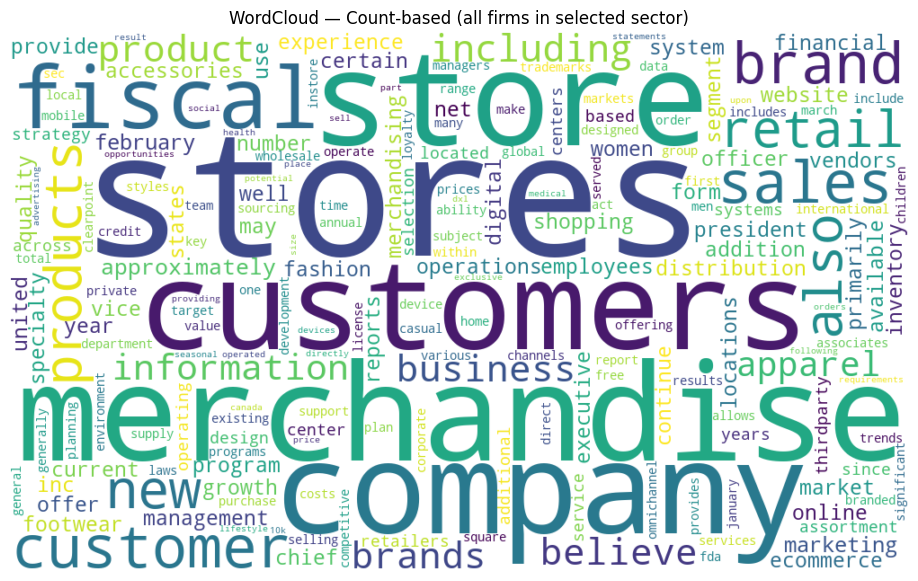

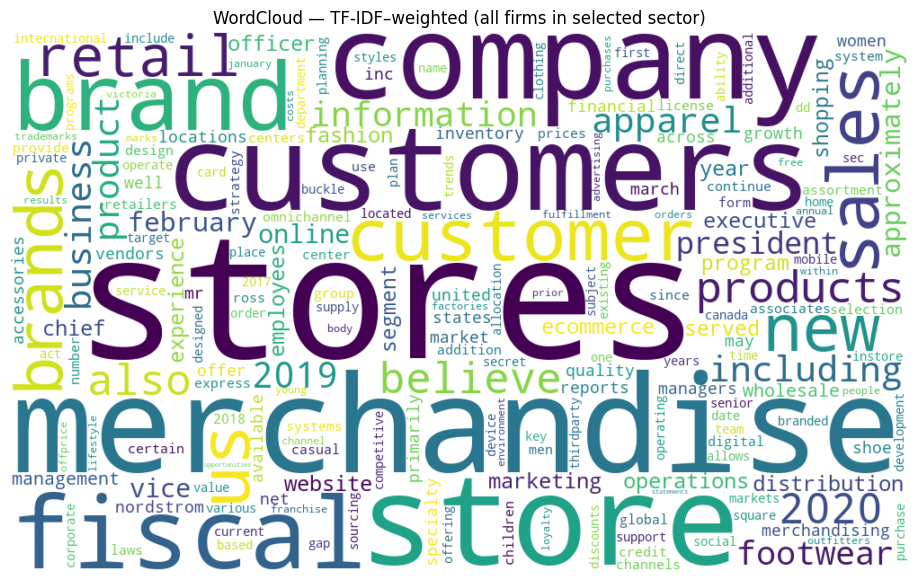

In [17]:
# D3. Wordclouds for the selected sector based on word counts and TF-IDF scores.
!pip install wordcloud scikit-learn
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# 1) Count-based wordcloud
# Build a global frequency dictionary from all cleaned tokens
all_tokens = " ".join(dfD["cleaned_text"].fillna("")).split()
freq = Counter(all_tokens)

# Filter out very short tokens or pure numbers
freq = {w: c for w, c in freq.items() if len(w) > 2 and not w.isdigit()}

# Generate the wordcloud from raw counts
wc_counts = WordCloud(width=1000, height=600, background_color="white")
wc_counts = wc_counts.generate_from_frequencies(freq)

plt.figure(figsize=(12, 7))
plt.imshow(wc_counts, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud — Count-based (all firms in selected sector)")
plt.show()

# 2) TF-IDF–based wordcloud
# Fit TF-IDF on the same cleaned texts
docs = dfD["cleaned_text"].fillna("")
vectorizer = TfidfVectorizer(
    max_features=5000,   # cap vocab size to reduce noise & speed up
    min_df=2,            # ignore terms appearing in < 2 documents
    lowercase=False      # already lowercased in the cleaning step
)
X = vectorizer.fit_transform(docs)            # CSR matrix: (n_docs, n_terms)
feature_names = vectorizer.get_feature_names_out()

# Sum TF-IDF scores across documents to get a global weight per term
scores = np.asarray(X.sum(axis=0)).ravel()    # shape: (n_terms,)

# keep top-N words to make the cloud cleaner
topN = 300
top_idx = scores.argsort()[::-1][:topN]
tfidf_freq = {feature_names[i]: float(scores[i]) for i in top_idx}

wc_tfidf = WordCloud(width=1000, height=600, background_color="white")
wc_tfidf = wc_tfidf.generate_from_frequencies(tfidf_freq)

plt.figure(figsize=(12, 7))
plt.imshow(wc_tfidf, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud — TF-IDF–weighted (all firms in selected sector)")
plt.show()